Our objective was to augment authors to add the appropriate tags for their project so the community can discover them. So we want to use the metadata provided in each project to determine what the relevant tags are. We'll want to start with the highly influential features and iteratively experiment with additional features.

### Load data

In [27]:
from collections import Counter, OrderedDict
import ipywidgets as widgets
import itertools
import json
import pandas as pd
from urllib.request import urlopen

In [28]:
# Load projects
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/projects.json"
projects = json.loads(urlopen(url).read())
print (json.dumps(projects[-305], indent=2))

{
  "id": 2106,
  "created_on": "2020-08-08 15:06:18",
  "title": "Fast NST for Videos (+ person segmentation) \ud83c\udfa5 + \u26a1\ud83d\udcbb + \ud83c\udfa8 = \u2764\ufe0f",
  "description": "Create NST videos and pick separate styles for the person in the video and for the background.",
  "tags": [
    "code",
    "tutorial",
    "video",
    "computer-vision",
    "style-transfer",
    "neural-style-transfer"
  ]
}


In [29]:
# import requests
# req = requests.get(url)
# proj = json.loads(req.content)
# print(json.dumps(proj[-305], indent = 2))

In [30]:
# Create dataframe
df = pd.DataFrame(projects)
print (f"{len(df)} projects")
df.head(5)

2032 projects


,id,created_on,title,description,tags
0,1,2020-02-17 06:30:41,Machine Learning Basics,A practical set of notebooks on machine learni...,"[code, tutorial, keras, pytorch, tensorflow, d..."
1,2,2020-02-17 06:41:45,Deep Learning with Electronic Health Record (E...,A comprehensive look at recent machine learnin...,"[article, tutorial, deep-learning, health, ehr]"
2,3,2020-02-20 06:07:59,Automatic Parking Management using computer vi...,Detecting empty and parked spaces in car parki...,"[code, tutorial, video, python, machine-learni..."
3,4,2020-02-20 06:21:57,Easy street parking using region proposal netw...,Get a text on your phone whenever a nearby par...,"[code, tutorial, python, pytorch, machine-lear..."
4,5,2020-02-20 06:29:18,Deep Learning based parking management system ...,Fastai provides easy to use wrappers to quickl...,"[code, tutorial, fastai, deep-learning, parkin..."


The reason we want to iteratively add more features is because it introduces more complexity and effort. We may have additional data about each feature such as author info, html from links in the description, etc. While these may have meaningful signal, we want to slowly introduce these after we close the loop.

### Auxiliary Data

We're also going to be using an auxiliary dataset which contains a collection of all the tags with their aliases and parent/child relationships. This auxiliary dataset was used by our application to automatically add the relevant parent tags when the child tags were present.

In [31]:
# Load tags
url = "https://raw.githubusercontent.com/GokuMohandas/MadeWithML/main/datasets/tags.json"
tags = json.loads(urlopen(url).read())
tags_dict = {}
for item in tags:
    key = item.pop("tag")
    tags_dict[key] = item
print (f"{len(tags_dict)} tags")

400 tags


In [32]:
@widgets.interact(tag=list(tags_dict.keys()))
def display_tag_details(tag='question-answering'):
    print (json.dumps(tags_dict[tag], indent=2))

interactive(children=(Dropdown(description='tag', index=283, options=('3d', 'action-localization', 'action-rec…

## Data Imbalance

There are several techniques to mitigate data imbalance, including resampling (oversampling from minority classes / undersampling from majority classes), account for the data distributions via the loss function (since that drives the learning process), etc.

## Libraries

We could have used the user provided tags as our labels but what if the user added a wrong tag or forgot to add a relevant one. To remove this dependency on the user to provide the gold standard labels, we can leverage labeling tools and platforms. These tools allow for quick and organized labeling of the dataset to ensure its quality. And instead of starting from scratch and asking our labeler to provide all the relevant tags for a given project, we can provide the author's original tags and ask the labeler to add / remove as necessary. The specific labeling tool may be something that needs to be custom built or leverages something from the ecosystem.

### General

- <a href="https://scale.com/">Scale AI</a>: the data platform for high quality training and validation data for AI applications.
- <a href="https://github.com/heartexlabs/label-studio">Label Studio</a>: a multi-type data labeling and annotation tool with standardized output format.
- <a href="https://github.com/UniversalDataTool/universal-data-tool">Universal Data Tool</a>: collaborate and label any type of data, images, text, or documents in an easy web interface or desktop app.
- <a href="https://github.com/explosion/prodigy-recipes">Prodigy</a>: recipes for the Prodigy, our fully scriptable annotation tool.
- <a href="https://github.com/janfreyberg/superintendent">Superintendent</a>: an ipywidget-based interactive labeling tool for your data to enable active learning.

### Natural language processing

- <a href="https://github.com/doccano/doccano">Doccano</a>: an open source text annotation tool for text classification, sequence labeling and sequence to sequence tasks.
- <a href="https://github.com/nlplab/brat">BRAT</a>: a rapid annotation tool for all your textual annotation needs.

### Computer Vision
- <a href="https://github.com/tzutalin/labelImg">LabelImg</a>: a graphical image annotation tool and label object bounding boxes in images.
- <a href="https://github.com/openvinotoolkit/cvat">CVAT</a>: a free, online, interactive video and image annotation tool for computer vision.
- <a href="https://github.com/Microsoft/VoTT">VoTT</a>: an electron app for building end-to-end object detection models from images and videos.
- <a href="https://github.com/SkalskiP/make-sense">makesense.ai</a>: a free to use online tool for labelling photos.
- <a href="https://github.com/rediscovery-io/remo-python">remo</a>: an app for annotations and images management in computer vision.
- <a href="https://github.com/aralroca/labelai">Labelai</a>: an online tool designed to label images, useful for training AI models.

### Audio
- <a href="https://github.com/midas-research/audino">Audino</a>: an open source audio annotation tool for voice activity detection (VAD), diarization, speaker identification, automated speech recognition, emotion recognition tasks, etc.
- <a href="https://github.com/CrowdCurio/audio-annotator">audio-annotator</a>: a JavaScript interface for annotating and labeling audio files.
- <a href="https://github.com/ritazh/EchoML">EchoML</a>: a web app to play, visualize, and annotate your audio files for machine learning.

### Miscellaneous
- <a href="https://github.com/CogStack/MedCAT">MedCAT</a>: a medical concept annotation tool that can extract information from Electronic Health Records(EHRs) and link it to biomedical ontologies like SNOMED-CT and UMLs.

## Active Learning
Even with a powerful labeling tool and established workflows, it's easy to see how involved and expensive labeling can be. Therefore, many teams employ active learning to iteratively label the dataset and evaluate the model.
1. Label a small, initial dataset to train a model.
2. Ask the trained model to predict on some unlabeled data.
3. Determine which new data points to label from the unlabeled data based on:
   - entropy over the predicted class probabilities.
   - samples with lowest predicted, calibrated, confidence (uncertainty sampling)
   - discrepancy in predictions from an ensemble of trained models
4. Repeat until the desired perdormance is achieved.

> This can be significantly more cost-effective and faster than labeling the entire dataset.

### Libraries
- <a href="https://github.com/modAL-python/modAL">ModAL</a>: a modular active learning framework for Python.
- <a href="https://github.com/ntucllab/libact">libact</a>: pool-based active learning in Python.
- <a href="https://github.com/NUAA-AL/ALiPy">ALiPy</a>: active learning python toolbox, which allows users to conveniently evaluate, compare and analyze the performance of active learning methods.

## Weak supervision
If we had samples that needed labeling or if we simply wanted to validate existing labels, we can use weak supervision to generate labels as opposed to hand labeling all of them. We could utilize weak supervision via labeling functions to label our existing and new data. We can create constructs based on keywords, pattern expressions, knowledge bases and generalized models to create these labeling functions to label our data. And we can add to the labeling functions over time and even mitigate conflicts amongst the different labeling functions.

In [33]:
!pip install snorkel

In [34]:
from snorkel.labeling import labeling_function

@labeling_function()
def contains_tensorflow(text):
    condition = any(tag in text.lower() for tag in ("tensorflow", "tf"))
    return "tensorflow" if condition else None

## Iteration
Labeling isn't just a one time event or something we repeat identically. As new data is available, we'll want to strategically label the appropriate samples and improve slices of our data that are lacking in quality. In fact, there's an entire workflow related to labeling that is initiated when we want to iterate. We'll learn more about this iterative labeling process in our continual learning lesson.

## Data Preprocessing

Data preprocessing can be categorized into two types of processes: *preparation* and *transformation*. We'll explore common preprocessing techniques and then walkthrough the relevant processes for our specific application.

### Feature Engineering

We can combine existing input features to create new meaningful signal (helping the model learn). However, there's usually no simple way to know if certain feature combinations will help or not without empirically experimenting with the different combinations. Here, we could use a project's title and description separately as features but we'll combine them to create one input feature.

In [35]:
df["text"] = df.title + " " + df.description

In [36]:
df.head()

,id,created_on,title,description,tags,text
0,1,2020-02-17 06:30:41,Machine Learning Basics,A practical set of notebooks on machine learni...,"[code, tutorial, keras, pytorch, tensorflow, d...",Machine Learning Basics A practical set of not...
1,2,2020-02-17 06:41:45,Deep Learning with Electronic Health Record (E...,A comprehensive look at recent machine learnin...,"[article, tutorial, deep-learning, health, ehr]",Deep Learning with Electronic Health Record (E...
2,3,2020-02-20 06:07:59,Automatic Parking Management using computer vi...,Detecting empty and parked spaces in car parki...,"[code, tutorial, video, python, machine-learni...",Automatic Parking Management using computer vi...
3,4,2020-02-20 06:21:57,Easy street parking using region proposal netw...,Get a text on your phone whenever a nearby par...,"[code, tutorial, python, pytorch, machine-lear...",Easy street parking using region proposal netw...
4,5,2020-02-20 06:29:18,Deep Learning based parking management system ...,Fastai provides easy to use wrappers to quickl...,"[code, tutorial, fastai, deep-learning, parkin...",Deep Learning based parking management system ...


### Filtering

In the same vain, we can also reduce the size of our data by placing constraints as to what data is worth annotation or labeling. Here we decide to filter tags above a certain frequency threshold because those with fewer samples won't be adequate for training.

In [37]:
def filter(l, include=[], exclude=[]):
    filtered = [item for item in l if item in include and item not in exclude]
    return filtered

In [38]:
# Inclusion/exclusion criteria for tags
include = list(tags_dict.keys())
exclude = ["machine-learning", "deep-learning",  "data-science",
           "neural-networks", "python", "r", "visualization"]

In [39]:
# Filter tags for each project
df.tags = df.tags.apply(filter, include=include, exclude=exclude)
tags = Counter(itertools.chain.from_iterable(df.tags.values))

We're also going to restrict the mapping to only tags that are above a certain frequency threshold. The tags that don't have enough projects will not have enough samples to model their relationships. 

In [40]:
tags.most_common()

[('natural-language-processing', 424),
 ('computer-vision', 388),
 ('pytorch', 258),
 ('tensorflow', 213),
 ('transformers', 196),
 ('attention', 120),
 ('convolutional-neural-networks', 106),
 ('keras', 93),
 ('graphs', 78),
 ('embeddings', 75),
 ('generative-adversarial-networks', 73),
 ('object-detection', 69),
 ('huggingface', 64),
 ('scikit-learn', 60),
 ('reinforcement-learning', 59),
 ('representation-learning', 57),
 ('interpretability', 55),
 ('graph-neural-networks', 51),
 ('language-modeling', 51),
 ('image-classification', 51),
 ('production', 51),
 ('regression', 49),
 ('segmentation', 48),
 ('transfer-learning', 46),
 ('autoencoders', 41),
 ('data-augmentation', 41),
 ('self-supervised-learning', 40),
 ('tensorflow-js', 40),
 ('unsupervised-learning', 39),
 ('wandb', 39),
 ('flask', 34),
 ('time-series', 34),
 ('node-classification', 33),
 ('question-answering', 32),
 ('pretraining', 30),
 ('fastai', 29),
 ('graph-classification', 29),
 ('model-compression', 29),
 ('recur

In [41]:
@widgets.interact(min_tag_freq=(0, tags.most_common()[0][1]))
def separate_tags_by_freq(min_tag_freq=30):
    tags_above_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] >= min_tag_freq)
    tags_below_freq = Counter(tag for tag in tags.elements()
                                    if tags[tag] < min_tag_freq)
    print ("Most popular tags:\n", tags_above_freq.most_common(5))
    print ("\nTags that just made the cut:\n", tags_above_freq.most_common()[-5:])
    print ("\nTags that just missed the cut:\n", tags_below_freq.most_common(5))

interactive(children=(IntSlider(value=30, description='min_tag_freq', max=424), Output()), _dom_classes=('widg…

In [42]:
# Filter tags that have fewer than <min_tag_freq> occurances
min_tag_freq = 30
tags_above_freq = Counter(tag for tag in tags.elements() if tags[tag] >= min_tag_freq)
df.tags = df.tags.apply(filter, include=list(tags_above_freq.keys()))

### Cleaning

After applying our filters, it's important that we remove any samples that didn't make the cut. In our case, we'll want to remove inputs that have no remaining (not enough frequency) tags.

In [43]:
# Remove projects with no more remaining relevant tags
df = df[df.tags.map(len) > 0]
print (f"{len(df)} projects")

1444 projects


## Exploration

Exploratory data analysis (EDA) is a vital (and fun) step in the data science process but it's often misconstrued. Here's how to think about EDA:
- not just to visualize a prescribed set of plots (correlation matrix, etc.).
- goal is to convince yourself that the data you have is sufficient for the task.
- use EDA to answer important questions and to make it easier to extract insight
- not a one time process; as your data grows, you want to revisit EDA to catch distribution shifts, anomalies, etc.


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from wordcloud import WordCloud, STOPWORDS
warnings.filterwarnings("ignore")

### Tags per project

**Q1.** How many (post filtered) tags do the projects have? We care about this because we want to make sure we don't overwhelm the user with too many tags (UX constraint).

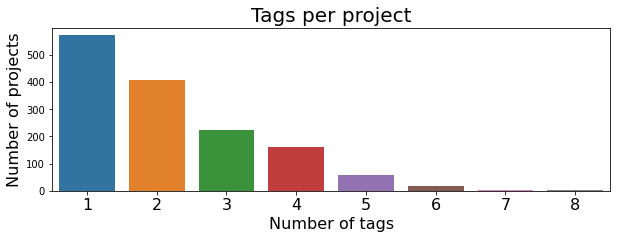

In [45]:
# Number of tags per project
num_tags_per_project = [len(tags) for tags in df.tags]
num_tags, num_projects = zip(*Counter(num_tags_per_project).items())
plt.figure(figsize=(10, 3))
ax = sns.barplot(list(num_tags), list(num_projects))
plt.title("Tags per project", fontsize=20)
plt.xlabel("Number of tags", fontsize=16)
ax.set_xticklabels(range(1, len(num_tags)+1), rotation=0, fontsize=16)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

In [46]:
num_tags

(4, 1, 2, 3, 5, 8, 6, 7)

### Tag distribution

**Q2.** What are the most popular tags? We care about this because it's important to know about the distribution of tags and what tags just made the cut (for performance).

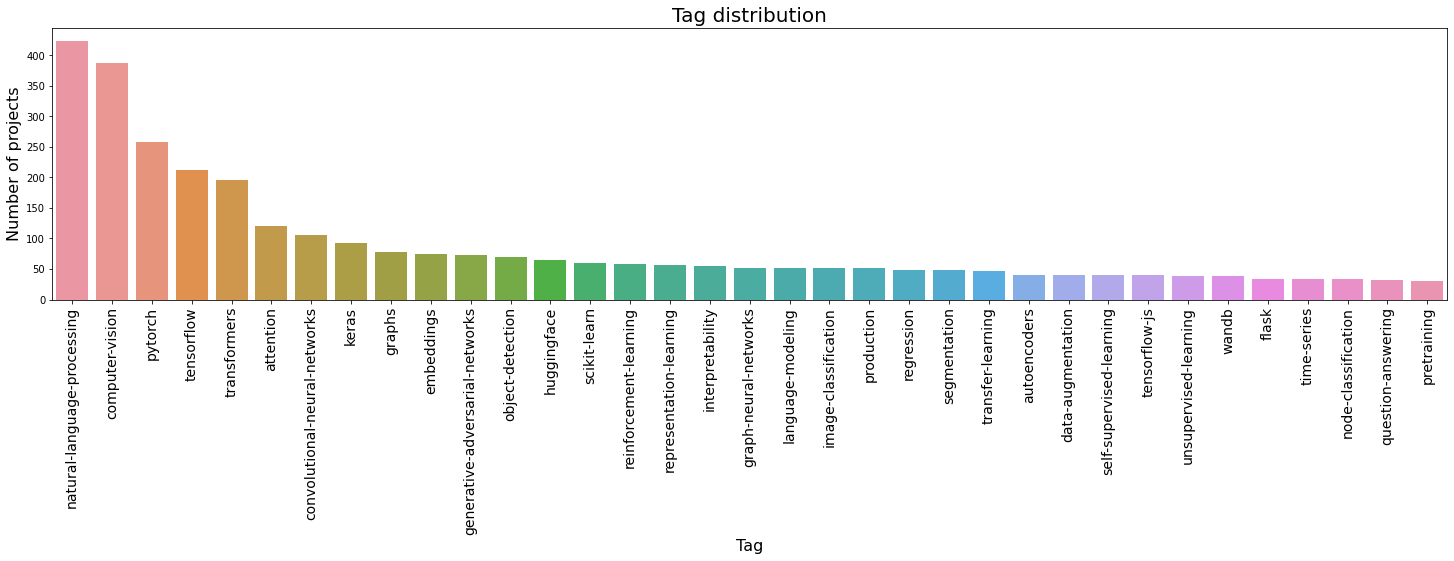

In [47]:
# Distribution of tags
all_tags = list(itertools.chain.from_iterable(df.tags.values))
tags, tag_counts = zip(*Counter(all_tags).most_common())
plt.figure(figsize=(25, 5))
ax = sns.barplot(list(tags), list(tag_counts))
plt.title("Tag distribution", fontsize=20)
plt.xlabel("Tag", fontsize=16)
ax.set_xticklabels(tags, rotation=90, fontsize=14)
plt.ylabel("Number of projects", fontsize=16)
plt.show()

In [48]:
list(itertools.chain.from_iterable(df.tags.values))

['keras',
 'pytorch',
 'tensorflow',
 'natural-language-processing',
 'computer-vision',
 'pytorch',
 'computer-vision',
 'computer-vision',
 'attention',
 'computer-vision',
 'embeddings',
 'graph-neural-networks',
 'graphs',
 'representation-learning',
 'convolutional-neural-networks',
 'regression',
 'graphs',
 'reinforcement-learning',
 'embeddings',
 'graphs',
 'node-classification',
 'tensorflow',
 'embeddings',
 'graphs',
 'node-classification',
 'embeddings',
 'graphs',
 'node-classification',
 'transfer-learning',
 'embeddings',
 'graph-neural-networks',
 'graphs',
 'node-classification',
 'embeddings',
 'graphs',
 'node-classification',
 'graphs',
 'node-classification',
 'pytorch',
 'embeddings',
 'graphs',
 'node-classification',
 'representation-learning',
 'pytorch',
 'graphs',
 'node-classification',
 'pytorch',
 'attention',
 'convolutional-neural-networks',
 'embeddings',
 'graph-neural-networks',
 'graphs',
 'node-classification',
 'representation-learning',
 'pytorch

## Wordcloud

**Q3.** Is there enough signal in the title and description that's unique to each tag? This is important because we want to verify our initial hypothesis that the project's title and description are highly influential features.

interactive(children=(Dropdown(description='tag', index=2, options=('natural-language-processing', 'computer-v…

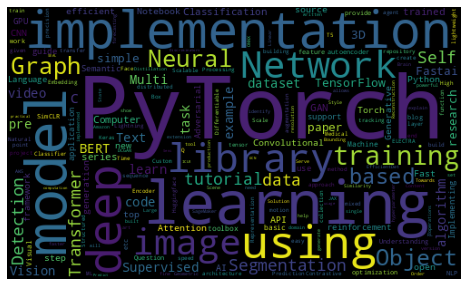

In [49]:
@widgets.interact(tag=list(tags))
def display_word_cloud(tag="pytorch"):
    # Plot word clouds top top tags
    plt.figure(figsize=(15, 5))
    subset = df[df.tags.apply(lambda tags: tag in tags)]
    text = subset.text.values
    cloud = WordCloud(
        stopwords=STOPWORDS, background_color="black", collocations=False,
        width=500, height=300).generate(" ".join(text))
    plt.axis("off")
    plt.imshow(cloud)

## Splitting a Dataset for Multilabel Classification

### Intuition

To determine the efficacy of our models, we need to have an unbiased measuring approach. To do this, we split our dataset into `training`, `validation`, and `testing` data splits.

1. Use the training split to train the model.
> Here, the model will have access to both inputs and outputs to optimize its internal weights.

2. After each loop (epoch) of the training split, we'll use the validation split to determine model performance.
> Here the model will not use the outputs to optimize its weights but instead, we'll use the performance to optimize training hyperparameters such as the learning rate, etc.

3. After training stops (epoch(s)), we'll use the testing split to perform a one-time assessment of the model.
> This is our best measure of how the model may behave on new unseen data. Note that *training stops* when the performance improvement is not significant or any other stopping criteria that we may have specified.

**Criteria of proper dataa split:**
- the dataset(and each data split) should be representative of data we will encounter
- equal distributions of output values across all splits
- shuffle your data if it's organized in a way that prevents input variance
- avoid random shuffles if your task can suffer from data leaks(time-series)

## Label Encoding

In [50]:
import numpy as np
import random

seed = 42
np.random.seed(seed)
random.seed(seed)

In [51]:
df = df.sample(frac=1).reset_index(drop=True)

X = df.text.to_numpy()
y = df.tags

In [52]:
class LabelEncoder(object):
    """Label encoder for tag labels."""
    def __init__(self, class_to_index={}):
        self.class_to_index = class_to_index
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())

    def __len__(self):
        return len(self.class_to_index)

    def __str__(self):
        return f"<LabelEncoder(num_classes={len(self)})>"

    def fit(self, y):
        classes = np.unique(list(itertools.chain.from_iterable(y)))
        for i, class_ in enumerate(classes):
            self.class_to_index[class_] = i
        self.index_to_class = {v: k for k, v in self.class_to_index.items()}
        self.classes = list(self.class_to_index.keys())
        return self

    def encode(self, y):
        y_one_hot = np.zeros((len(y), len(self.class_to_index)), dtype=int)
        for i, item in enumerate(y):
            for class_ in item:
                y_one_hot[i][self.class_to_index[class_]] = 1
        return y_one_hot

    def decode(self, y):
        classes = []
        for i, item in enumerate(y):
            indices = np.where(item == 1)[0]
            classes.append([self.index_to_class[index] for index in indices])
        return classes

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {"class_to_index": self.class_to_index}
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [53]:
# Encode
label_encoder = LabelEncoder()
label_encoder.fit(y)
num_classes = len(label_encoder)

In [54]:
label_encoder.class_to_index

{'attention': 0,
 'autoencoders': 1,
 'computer-vision': 2,
 'convolutional-neural-networks': 3,
 'data-augmentation': 4,
 'embeddings': 5,
 'flask': 6,
 'generative-adversarial-networks': 7,
 'graph-neural-networks': 8,
 'graphs': 9,
 'huggingface': 10,
 'image-classification': 11,
 'interpretability': 12,
 'keras': 13,
 'language-modeling': 14,
 'natural-language-processing': 15,
 'node-classification': 16,
 'object-detection': 17,
 'pretraining': 18,
 'production': 19,
 'pytorch': 20,
 'question-answering': 21,
 'regression': 22,
 'reinforcement-learning': 23,
 'representation-learning': 24,
 'scikit-learn': 25,
 'segmentation': 26,
 'self-supervised-learning': 27,
 'tensorflow': 28,
 'tensorflow-js': 29,
 'time-series': 30,
 'transfer-learning': 31,
 'transformers': 32,
 'unsupervised-learning': 33,
 'wandb': 34}

In [55]:
# Sample
label_encoder.encode([["attention", "data-augmentation"]])

array([[1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [56]:
# Encode all our labels
y = label_encoder.encode(y)

## Naive split

or traditional multi-class tasks (each input has one label), we want to ensure that each data split has similar class distributions. However, our task is multi-label classification (an input can have many labels) which complicates the stratification process.

First, we'll naively split our dataset randomly and show the large deviations between the (adjusted) class distributions across the splits. We'll use scikit-learn's train_test_split function to do the splits.

In [57]:
!pip install scikit-multilearn

In [58]:
from sklearn.model_selection import train_test_split
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

In [59]:
df

,id,created_on,title,description,tags,text
0,623,2020-04-24 00:30:02,medaCy,🏥 Medical Text Mining and Information Extracti...,[natural-language-processing],medaCy 🏥 Medical Text Mining and Information E...
1,474,2020-04-13 22:48:49,PyTorch Tutorial for Deep Learning Researchers,This repository provides tutorial code for dee...,"[pytorch, autoencoders, generative-adversarial...",PyTorch Tutorial for Deep Learning Researchers...
2,1775,2020-07-11 05:28:14,DeltaPy⁠⁠,Tabular Data Augmentation & Feature Engineering.,[data-augmentation],DeltaPy⁠⁠ Tabular Data Augmentation & Feature...
3,97,2020-03-20 19:10:58,Graph Convolution on Structured Documents,Convert structured documents to graphs for doc...,"[computer-vision, graph-neural-networks, graphs]",Graph Convolution on Structured Documents Conv...
4,1760,2020-07-11 04:42:17,Dataturks,"ML data annotations made super easy for teams,...","[computer-vision, natural-language-processing,...",Dataturks ML data annotations made super easy ...
...,...,...,...,...,...,...
1439,1870,2020-07-15 20:38:36,Interpretability and Analysis of Models for NLP,An in-depth look at interpretability and analy...,"[interpretability, natural-language-processing]",Interpretability and Analysis of Models for NL...
1440,1919,2020-07-20 05:53:12,Dframcy,DframCy is a light-weight utility module to in...,[natural-language-processing],Dframcy DframCy is a light-weight utility modu...
1441,2213,2020-08-24 07:37:34,Towards representation learning for an image r...,This project explains self-supervised and regu...,"[tensorflow, autoencoders, representation-lear...",Towards representation learning for an image r...
1442,1499,2020-06-18 13:41:39,History of Language Models - Alec Radford,A quick history of language models,"[transformers, language-modeling, natural-lang...",History of Language Models - Alec Radford A qu...


In [60]:
train_size = 0.7
val_size = 0.15
test_size = 0.15

X_train, X_, y_train, y_ = train_test_split(X, y, train_size = train_size)

In [61]:
print (f"train: {len(X_train)} ({(len(X_train) / len(X)):.2f})\n"
       f"remaining: {len(X_)} ({(len(X_) / len(X)):.2f})")

train: 1010 (0.70)
remaining: 434 (0.30)


In [62]:
# Split (test)
X_val, X_test, y_val, y_test = train_test_split(
    X_, y_, train_size=0.5)

In [63]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1010 (0.70)
val: 217 (0.15)
test: 217 (0.15)


In [64]:
# Get counts for each class
counts = {}
counts["train_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts["val_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts["test_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [65]:
# View distributions
dist_df = pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

In [66]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

23.49355226270514

It's hard to compare these because our train and test proportions are different. Let's see what the distribution looks like once we balance it out. What do we need to multiply our test ratio by so that we have the same amount as our train ratio?

In [67]:
# Adjust counts across splits
for k in counts["val_counts"].keys():
    counts["val_counts"][k] = int(counts["val_counts"][k] * \
        (train_size/val_size))
for k in counts["test_counts"].keys():
    counts["test_counts"][k] = int(counts["test_counts"][k] * \
        (train_size/test_size))

## Stratified Sampling

Now we'll apply iterative stratification via the skmultilearn library, which essentially splits each input into subsets (where each label is considered individually) and then it distributes the samples starting with fewest "positive" samples and working up to the inputs that have the most labels.

In [68]:
from skmultilearn.model_selection import IterativeStratification

In [69]:
def iterative_train_test_split(X, y, train_size):
    """Custom iterative train test split which
    'maintains balanced representation with respect
    to or1
    der-th label combinations.'
    """
    stratifier = IterativeStratification(
        n_splits=2, order=1, sample_distribution_per_fold=[1.0-train_size, train_size, ])
    train_indices, test_indices = next(stratifier.split(X, y))
    X_train, y_train = X[train_indices], y[train_indices]
    X_test, y_test = X[test_indices], y[test_indices]
    return X_train, X_test, y_train, y_test

In [70]:
# Get data
X = df.text.to_numpy()
y = df.tags

In [71]:
# Binarize y
label_encoder = LabelEncoder()
label_encoder.fit(y)
y = label_encoder.encode(y)

In [72]:
# Split
X_train, X_, y_train, y_ = iterative_train_test_split(
    X, y, train_size=train_size)
X_val, X_test, y_val, y_test = iterative_train_test_split(
    X_, y_, train_size=0.5)

In [73]:
print(f"train: {len(X_train)} ({len(X_train)/len(X):.2f})\n"
      f"val: {len(X_val)} ({len(X_val)/len(X):.2f})\n"
      f"test: {len(X_test)} ({len(X_test)/len(X):.2f})")

train: 1023 (0.71)
val: 218 (0.15)
test: 203 (0.14)


In [74]:
# Get counts for each class
counts = {}
counts["train_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_train, order=1) for combination in row)
counts["val_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_val, order=1) for combination in row)
counts["test_counts"] = Counter(str(combination) for row in get_combination_wise_output_matrix(
    y_test, order=1) for combination in row)

In [75]:
# Adjust counts across splits
for k in counts["val_counts"].keys():
    counts["val_counts"][k] = int(counts["val_counts"][k] * \
        (train_size/val_size))
for k in counts["test_counts"].keys():
    counts["test_counts"][k] = int(counts["test_counts"][k] * \
        (train_size/test_size))

In [76]:
# View distributions
dist_df = pd.DataFrame({
    "train": counts["train_counts"],
    "val": counts["val_counts"],
    "test": counts["test_counts"]
}).T.fillna(0)

In [77]:
# Standard deviation
np.mean(np.std(dist_df.to_numpy(), axis=0))

4.878424991639657

The standard deviation is much better but not 0 (perfect splits) because keep in mind that an input can have any combination of of classes yet each input can only belong in one of the data splits.

Iterative stratification essentially creates splits while "trying to maintain balanced representation with respect to order-th label combinations". We used to an order=1 for our iterative split which means we cared about providing representative distribution of each tag across the splits. But we can account for higher-order label relationships as well where we may care about the distribution of label combinations.

## Data Augmentation

### Intuition

We'll often want to increase the size and diversity of our training data split through data augmentation. It involves using the existing samples to generate synthetic, yet realistic, examples.

1. **Split the dataset** - We want to split our dataset first because many augmentation techniques will cause a form of data leak if we allow the generated samples to be placed across different data splits.
> For example, some augmentation involves generating synonyms for certain key tokens in a sentence. If we allow the generated sentences from the same origin sentence to go into different splits, we could be potentially leaking samples with nearly identical embedding representations across our different splits.

2. **Augment the training split** - We want to apply data augmentation on only the training set because our validation and testing splits should be used to provide an accurate estimate on actual data points.

3. **Inspect and validate** - It's useless to augment just for the sake of increasing our training samples if the augmented data samples are not probable inputs that our model could encounter in production.

The exact method of data augmentation depends largely on the type of data and the application. Here are a few ways different modalities of data can be augmented:

- **General**: normalization, smoothing, random noise, etc. can be used for audio, tabular and other forms of data.
- **Natural language processing (NLP)**: substitutions (synonyms, tfidf, embeddings, masked models), random noise, spelling errors, etc.
- **Computer Vision (CV)**: crop, flip, rotate, pad, saturate, increase brightness, etc.

## Libraries
Depending on the feature types and tasks, there are many data augmentation libraries which allow us to extend our training data.

### Natural language processing (NLP)
- NLPAug: data augmentation for NLP.
- TextAttack: a framework for adversial attacks, data augmentation, and model training in NLP.
- TextAugment: text augmentation library.

### Computer vision (CV)
- Imgaug: image augmentation for machine learning experiments.
- Albumentation: fast image augmentation library.
- Augmentor: image augmentation library in Python for machine learning.
- Kornia.augmentation: a module to perform data augmentation in the GPU.
- SOLT: data augmentation library for Deep Learning, which supports images, segmentation masks, labels and key points.

### Other
- Snorkel: system for generating training data with weak supervision.
- DeltaPy: tabular data augmentation and feature engineering.
- Audiomentations: a Python library for audio data augmentation.
- Tsaug: a Python package for time series augmentation.

## Application
Let's use the nlpaug library to augment our dataset and assess the quality of the generated samples.

In [53]:
# !pip install cython
# !pip install snorkel==0.9.6 -q

In [52]:
import nlpaug.augmenter.word as naw

# Load tokenizers and transformers
substitution = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="substitute")
insertion = naw.ContextualWordEmbsAug(model_path="distilbert-base-uncased", action="insert")
text = "Conditional image generation using Variational Autoencoders and GANs."

AttributeError: 'DistilBertTokenizerFast' object has no attribute '_convert_token_to_id'

In [ ]:
# Substitutions
augmented_text = substitution.augment(text)
print (augmented_text)

Substitution doesn't seem like a great idea for us because there are certain keywords that provide strong signal for our tags so we don't want to alter those. Also, note that these augmentations are NOT deterministic and will vary every time we run them. Let's try insertion...

In [ ]:
# Insertions
augmented_text = insertion.augment(text)
print (augmented_text)

A little better but still quite fragile and now it can potentially insert key words that can influence false positive tags to appear. Maybe instead of substituting or inserting new tokens, let's try simply swapping machine learning related keywords with their aliases from our auxiliary data. We'll use Snorkel's transformation functions to easily achieve this.

In [ ]:
!pip install inflect
import inflect
from snorkel.augmentation import transformation_function
inflect = inflect.engine()

In [ ]:
# Inflect
print (inflect.singular_noun("graphs"))
print (inflect.singular_noun("graph"))
print (inflect.plural_noun("graph"))
print (inflect.plural_noun("graphs"))

In [ ]:
def replace_dash(x):
    return x.replace("-", " ")

In [ ]:
flat_tags_dict = {}
for tag, info in tags_dict.items():
    tag = tag.replace("-", " ")
    aliases = list(map(replace_dash, info["aliases"]))
    if len(aliases):
        flat_tags_dict[tag] = aliases
    for alias in aliases:
        _aliases = aliases + [tag]
        _aliases.remove(alias)
        flat_tags_dict[alias] = _aliases

In [ ]:
# Tags that could be singular or plural
can_be_singular = [
    'animations',
    'cartoons',
    'autoencoders',
    'data streams',
    'support vector machines',
    'variational autoencoders'
]
can_be_plural = [
    'annotation',
    'data annotation',
    'continuous integration',
    'vqa',
    'visualization',
    'data visualization'
]

In [ ]:
# Add to flattened dict
for tag in can_be_singular:
    flat_tags_dict[inflect.singular_noun(tag)] = flat_tags_dict[tag]
for tag in can_be_plural:
    flat_tags_dict[inflect.plural_noun(tag)] = flat_tags_dict[tag]

In [ ]:
# Doesn't perfectly match (ex. singlar tag to singlar alias)
# But good enough for data augmentation for char-level tokenization
# Could've also used stemming before swapping aliases
print (flat_tags_dict["gan"])
print (flat_tags_dict["gans"])
print (flat_tags_dict["generative adversarial network"])
print (flat_tags_dict["generative adversarial networks"])

In [ ]:
# We want to match with the whole word only
print ("gan" in "This is a gan.")
print ("gan" in "This is gandalf.")

In [ ]:
import re
def find_word(word, text):
    word = word.replace("+", "\+")
    pattern = re.compile(fr"\b({word})\b", flags=re.IGNORECASE)
    return pattern.search(text)

In [ ]:
# Correct behavior (single instance)
print (find_word("gan", "This is a gan."))
print (find_word("gan", "This is gandalf."))

In [ ]:
@transformation_function()
def swap_aliases(x):
    """Swap ML keywords with their aliases."""

    # Find all matches
    matches = []
    for i, tag in enumerate(flat_tags_dict):
        match = find_word(tag, x.text)
        if match:
            matches.append(match)

    # Swap a random match with a random alias
    if len(matches):
        match = random.choice(matches)
        tag = x.text[match.start():match.end()]
        x.text = f"{x.text[:match.start()]}{random.choice(flat_tags_dict[tag])}{x.text[match.end():]}"
    return x

In [ ]:
# Swap
for i in range(3):
    sample_df = pd.DataFrame([{"text": "a survey of reinforcement learning for nlp tasks."}])
    sample_df.text = sample_df.text.apply(preprocess, lower=True, stem=False)
    print (swap_aliases(sample_df.iloc[0]).text)

In [ ]:
# Undesired behavior (needs contextual insight)
for i in range(3):
    sample_df = pd.DataFrame([{"text": "Autogenerate your CV to apply for jobs using NLP."}])
    sample_df.text = sample_df.text.apply(preprocess, lower=True, stem=False)
    print (swap_aliases(sample_df.iloc[0]).text)

Now we'll define a augmentation policy to apply our transformation functions with certain rules (how many samples to generate, whether to keep the original data point, etc.)

In [ ]:
from snorkel.augmentation import ApplyOnePolicy, PandasTFApplier

In [ ]:
# Transformation function (TF) policy
policy = ApplyOnePolicy(n_per_original=5, keep_original=True)
tf_applier = PandasTFApplier([swap_aliases], policy)
train_df_augmented = tf_applier.apply(train_df)
train_df_augmented.drop_duplicates(subset=["text"], inplace=True)
train_df_augmented.head()

For now, we'll skip the data augmentation because it's quite fickle and empirically it doesn't improvement performance much. But we can see how this can be very effective once we can control what type of vocabulary to augment on and what exactly to augment with.

## Baselines

### Intuition
Baselines are simple benchmarks which pave the way for iterative development:

- Rapid experimentation via hyperparameter tuning thanks to low model complexity.
- Discovery of data issues, false assumptions, bugs in code, etc. since model itself is not complex.
- Pareto's principle: we can achieve decent performance with minimal initial effort.

### Process
Here is the high level approach to establishing baselines:
1. Start with the simplest possible baseline to compare subsequent development with. This is often a random (chance) model.
2. Develop a rule-based approach (when possible) using IFTTT, auxiliary data, etc.
3. Slowly add complexity by *addressing* limitations and *motivating* representations and model architectures.
4. Weigh *tradeoffs* (performances, latency, size, etc.) between performant baselines.
5. Revisit and iterate on baselines as your dataset grows.

We can also baseline on your dataset. Instead of using a fixed dataset and iterating on the models, choose a good baseline and iterate on the dataset:

- remove or fix data samples (FP, FN)
- prepare and transform features
- expand or consolidate classes
- incorporate auxiliary datasets
- identify unique slices to boost

Tradeoffs to consider for model architecture(s):
- `performance`: consider coarse-grained and fine-grained (ex. per-class) performance.
- `latency`: how quickly does your model respond for inference.
- `size`: how large is your model and can you support it's storage
- `compute`: how much will it cost (dollars, carbon footprint, etc)?
- `interpretability`: does your model need to explain its predictions?
- `bias checks`: does your model pass key bias checks?
- `time to develop`: how long do you have to develop the first version?
- `time to retrain`: how long does it take to retrain your model? This is very important to consider if you need to retrain often.
- `maintenance overhead`: who and what will be required to maintain your model versions because the real work with ML begins after deploying v1. You can't just hand it off to your site reliability team to maintain it like many teams do with traditional software.

### Application
Each application's baseline trajectory varies based on the task and motivations. For our application, we're going to follow this path:
1. Random
2. Rule-based
3. Simple ML
4. CNN w/ embeddings

We'll motivate the need for slowly adding complexity from both the **representation** (ex. embeddings) and **architecture** (ex. CNNs) views, as well as address the limitation at each step of the way.

In [78]:
from sklearn.metrics import precision_recall_fscore_support
import torch

In [79]:
def set_seeds(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

In [80]:
def get_data_splits(df, train_size=0.7):
    """"""
    # Get data
    X = df.text.to_numpy()
    y = df.tags

    # Binarize y
    label_encoder = LabelEncoder()
    label_encoder.fit(y)
    y = label_encoder.encode(y)

    # Split
    X_train, X_, y_train, y_ = iterative_train_test_split(
        X, y, train_size=train_size)
    X_val, X_test, y_val, y_test = iterative_train_test_split(
        X_, y_, train_size=0.5)

    return X_train, X_val, X_test, y_train, y_val, y_test, label_encoder

We'll define a Trainer object which we will use for training, validation and inference. 

In [81]:
class Trainer(object):
    def __init__(self, model, device, loss_fn=None, optimizer=None, scheduler=None):
        self.model = model
        self.device = device
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler
        
    def train_step(self, dataloader):
        self.model.train()
        loss = 0.0
        
        for i, batch in enumerate(dataloader):
            batch = [item.to(self.device) for item in batch]
            inputs, targets = batch[:-1], batch[-1]
            self.optimizer.zero_grad()
            z = self.model(inputs)
            J = self.loss_fn(z, targets)
            J.backward()
            self.optimizer.step()
            
            loss += (J.detach().item() - loss) / (i+1)
        
        return loss

    def eval_step(self, dataloader):
        self.model.eval()
        loss = 0.0
        y_trues, y_probs = [], []

        # Iterate over val batches
        with torch.inference_mode():
            for i, batch in enumerate(dataloader):

                # Step
                batch = [item.to(self.device) for item in batch]  # Set device
                inputs, y_true = batch[:-1], batch[-1]
                z = self.model(inputs)  # Forward pass
                J = self.loss_fn(z, y_true).item()

                # Cumulative Metrics
                loss += (J - loss) / (i + 1)

                # Store outputs
                y_prob = torch.sigmoid(z).cpu().numpy()
                y_probs.extend(y_prob)
                y_trues.extend(y_true.cpu().numpy())

        return loss, np.vstack(y_trues), np.vstack(y_probs)
    
    def predict_step(self, dataloader):
        """Prediction step."""
        # Set model to eval mode
        self.model.eval()
        y_probs = []

        # Iterate over val batches
        with torch.inference_mode():
            for i, batch in enumerate(dataloader):

                # Forward pass w/ inputs
                inputs, targets = batch[:-1], batch[-1]
                z = self.model(inputs)

                # Store outputs
                y_prob = torch.sigmoid(z).cpu().numpy()
                y_probs.extend(y_prob)

        return np.vstack(y_probs)
    
    def train(self, num_epochs, patience, train_dataloader, val_dataloader):
        best_val_loss = np.inf
        for epoch in range(num_epochs):
            # Steps
            train_loss = self.train_step(dataloader=train_dataloader)
            val_loss, _, _ = self.eval_step(dataloader=val_dataloader)
            self.scheduler.step(val_loss)

            # Early stopping
            if val_loss < best_val_loss:
                best_val_loss = val_loss
                best_model = self.model
                _patience = patience  # reset _patience
            else:
                _patience -= 1
            if not _patience:  # 0
                print("Stopping early!")
                break

            # Logging
            print(
                f"Epoch: {epoch+1} | "
                f"train_loss: {train_loss:.5f}, "
                f"val_loss: {val_loss:.5f}, "
                f"lr: {self.optimizer.param_groups[0]['lr']:.2E}, "
                f"_patience: {_patience}"
            )
        return best_model

Our dataset is small so we'll train using the whole dataset but for larger datasets, we should always test on a small subset (after shuffling when necessary) so we aren't wasting time on compute. Here's how we can easily do this:

In [56]:
# Shuffling since projects are chronologically organized
if shuffle:
    df = df.sample(frac=1).reset_index(drop=True)

# Subset
if num_samples:
    df = df[:num_samples]

NameError: name 'shuffle' is not defined

### Random
<u>Motivation</u>: We want to know what random (chance) performance looks like. All of our subsequent baselines should perform better than this.

In [82]:
# Set seeds
set_seeds()

In [83]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import word_tokenize
import re

In [84]:
nltk.download("stopwords")
STOPWORDS = stopwords.words("english")
porter = PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/anantvaid/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [85]:
def preprocess(text, stopwords=STOPWORDS, lower=True, stem=False):
    """Conditional preprocessing on our text unique to our task."""
    # Lower
    
    if lower:
        text = text.lower()

    # Remove stopwords
    pattern = re.compile(r"\b(" + r"|".join(stopwords) + r")\b\s*")
    text = pattern.sub("", text)

    # Remove words in parenthesis
    text = re.sub(r"\([^)]*\)", "", text)

    # Spacing and filters
    text = re.sub(r"([-;;.,!?<=>])", r" \1 ", text)  # separate punctuation tied to words
    text = re.sub("[^A-Za-z0-9]+", " ", text)  # remove non alphanumeric chars
    text = re.sub(" +", " ", text)  # remove multiple spaces
    text = text.strip()
    
    if stem:
        text = ' '.join([porter.stem(word) for word in word_tokenize(text)])

    return text

In [86]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
print (f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print (f"X_val: {X_val.shape}, y_val: {y_val.shape}")
print (f"X_test: {X_test.shape}, y_test: {y_test.shape}")

X_train: (1023,), y_train: (1023, 35)
X_val: (215,), y_val: (215, 35)
X_test: (206,), y_test: (206, 35)


In [87]:
# Label encoder
print (label_encoder)
print (label_encoder.classes)

<LabelEncoder(num_classes=35)>
['attention', 'autoencoders', 'computer-vision', 'convolutional-neural-networks', 'data-augmentation', 'embeddings', 'flask', 'generative-adversarial-networks', 'graph-neural-networks', 'graphs', 'huggingface', 'image-classification', 'interpretability', 'keras', 'language-modeling', 'natural-language-processing', 'node-classification', 'object-detection', 'pretraining', 'production', 'pytorch', 'question-answering', 'regression', 'reinforcement-learning', 'representation-learning', 'scikit-learn', 'segmentation', 'self-supervised-learning', 'tensorflow', 'tensorflow-js', 'time-series', 'transfer-learning', 'transformers', 'unsupervised-learning', 'wandb']


In [88]:
# Generate random predictions
y_pred = np.random.randint(low=0, high=2, size=(len(y_test), len(label_encoder.classes)))
print (y_pred.shape)
print (y_pred[0:5])

(206, 35)
[[0 0 1 1 1 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 1]
 [0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 0 1 0 1 0 0 0 0 1 1 0 0 1 0]
 [0 0 1 1 1 0 0 1 1 1 1 0 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 0]
 [0 1 0 0 0 1 1 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 0 0 1]
 [0 1 1 0 0 1 1 0 1 0 1 0 0 0 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 1]]


In [89]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.1413012833862053,
  "recall": 0.48590021691973967,
  "f1": 0.19899614568152524
}


We made the assumption that there is an equal probability for whether an input has a tag or not but this isn't true. Let's use the train split to figure out what the true probability is.

In [90]:
# Percentage of 1s (tag presence)
tag_p = np.sum(np.sum(y_train)) / (len(y_train) * len(label_encoder.classes))
print (tag_p)

0.062253875157100964


In [91]:
# Generate weighted random predictions
y_pred = np.random.choice(
    np.arange(0, 2), size=(len(y_test), len(label_encoder.classes)),
    p=[1-tag_p, tag_p])

In [92]:
# Validate percentage
np.sum(np.sum(y_pred)) / (len(y_pred) * len(label_encoder.classes))

0.05728155339805825

In [93]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.158003268051756,
  "recall": 0.05639913232104121,
  "f1": 0.0711867972030073
}


<u><i>Limitations</i></u>: we didn't use any of the signals from our inputs to affect our predictions, so nothing was learned.

## Rule-based
*motivation*: we want to use signals in our inputs (along with domain expertise and auxiliary data) to determine the labels.

What we do here is... We take the text and find if any of the tag is present in the text, if yes, we add the tag and also the parent tag along with it. Clearly, this is rule-based as we're performing searching and just appending it to our final answer.

In [94]:
# Set seeds
set_seeds()

### Unstemmed

In [95]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [96]:
# Restrict to relevant tags
print (len(tags_dict))
tags_dict = {tag: tags_dict[tag] for tag in label_encoder.classes}
print (len(tags_dict))

400
35


In [97]:
# Map aliases
aliases = {}
for tag, values in tags_dict.items():
    aliases[preprocess(tag)] = tag
    for alias in values["aliases"]:
        aliases[preprocess(alias)] = tag
aliases

{'attention': 'attention',
 'autoencoders': 'autoencoders',
 'ae': 'autoencoders',
 'computer vision': 'computer-vision',
 'cv': 'computer-vision',
 'vision': 'computer-vision',
 'convolutional neural networks': 'convolutional-neural-networks',
 'cnn': 'convolutional-neural-networks',
 'data augmentation': 'data-augmentation',
 'embeddings': 'embeddings',
 'flask': 'flask',
 'generative adversarial networks': 'generative-adversarial-networks',
 'gan': 'generative-adversarial-networks',
 'graph neural networks': 'graph-neural-networks',
 'gnn': 'graph-neural-networks',
 'graphs': 'graphs',
 'huggingface': 'huggingface',
 'image classification': 'image-classification',
 'interpretability': 'interpretability',
 'keras': 'keras',
 'language modeling': 'language-modeling',
 'lm': 'language-modeling',
 'natural language processing': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classification': 'node-classification',
 '

In [98]:
def get_classes(text, aliases, tags_dict):
    """If a token matches an alias,
    then add the corresponding tag
    class (and parent tags if any)."""
    classes = []
    for alias, tag in aliases.items():
        if alias in text:

            # Add tag
            classes.append(tag)

            # Add parent tags
            for parent in tags_dict[tag]["parents"]:
                classes.append(parent)

    return list(set(classes))

In [99]:
# Sample
text = "This project extends gans for data augmentation specifically for object detection tasks."
get_classes(text=preprocess(text), aliases=aliases, tags_dict=tags_dict)

['data-augmentation',
 'generative-adversarial-networks',
 'computer-vision',
 'object-detection']

In [100]:
# Prediction
y_pred = []
for text in X_test:
    classes = get_classes(text, aliases, tags_dict)
    y_pred.append(classes)

In [101]:
# Encode labels
y_pred = label_encoder.encode(y_pred)

In [102]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.9057038767450915,
  "recall": 0.41865509761388287,
  "f1": 0.5536268766844119
}


### Stemmed

We're looking for exact matches with the aliases which isn't always perfect, for example: 

In [103]:
print (aliases[preprocess("gan")])
# print (aliases[preprocess('gans')]) # this won't find any match
print (aliases[preprocess("generative adversarial networks")])
# print (aliases[preprocess('generative adversarial network')]) # this won't find any match

generative-adversarial-networks
generative-adversarial-networks


We don't want to keep adding explicit rules but we can use stemming to represent different forms of a word uniformly, for example: 

In [104]:
print (porter.stem("democracy"))
print (porter.stem("democracies"))

democraci
democraci


So let's now stem our aliases as well as the tokens in our input text and then look for matches. 

In [105]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [106]:
# Map aliases
aliases = {}
for tag, values in tags_dict.items():
    aliases[preprocess(tag, stem=True)] = tag
    for alias in values["aliases"]:
        aliases[preprocess(alias, stem=True)] = tag
aliases

{'attent': 'attention',
 'autoencod': 'autoencoders',
 'ae': 'autoencoders',
 'comput vision': 'computer-vision',
 'cv': 'computer-vision',
 'vision': 'computer-vision',
 'convolut neural network': 'convolutional-neural-networks',
 'cnn': 'convolutional-neural-networks',
 'data augment': 'data-augmentation',
 'embed': 'embeddings',
 'flask': 'flask',
 'gener adversari network': 'generative-adversarial-networks',
 'gan': 'generative-adversarial-networks',
 'graph neural network': 'graph-neural-networks',
 'gnn': 'graph-neural-networks',
 'graph': 'graphs',
 'huggingfac': 'huggingface',
 'imag classif': 'image-classification',
 'interpret': 'interpretability',
 'kera': 'keras',
 'languag model': 'language-modeling',
 'lm': 'language-modeling',
 'natur languag process': 'natural-language-processing',
 'nlp': 'natural-language-processing',
 'nlproc': 'natural-language-processing',
 'node classif': 'node-classification',
 'object detect': 'object-detection',
 'pretrain': 'pretraining',
 'pr

In [107]:
# Checks (we will write proper tests soon)
print (aliases[preprocess("gan", stem=True)])
print (aliases[preprocess("gans", stem=True)])
print (aliases[preprocess("generative adversarial network", stem=True)])
print (aliases[preprocess("generative adversarial networks", stem=True)])

generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks
generative-adversarial-networks


In [108]:
# Prediction
y_pred = []
for text in X_test:
    classes = get_classes(text, aliases, tags_dict)
    y_pred.append(classes)

In [109]:
# Encode labels
y_pred = label_encoder.encode(y_pred)

### Evaluation

We can look at overall and per-class performance on our test set.

In [110]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.8887025506203589,
  "recall": 0.4474885844748858,
  "f1": 0.5732419896803458
}


We achieved very high precision at the expense of low recall. Why?
Rule-based approaches can yield labels with high certainty when there is an absolute condition match (high precision) but it fails to generalize or learn implicit patterns to capture the rest of the cases (low recall).

### Inference

In [111]:
# Infer
text = "Transfer learning with transformers for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn transform self supervis learn


['self-supervised-learning', 'transfer-learning', 'transformers']

Now let's see what happens when we replace the word transformers with BERT. Sure we can add this as an alias but doing these kinds of ad-hoc updates can quickly add overhead. This is where it makes sense to learn from the data as opposed to creating explicit rules. 

In [112]:
# Infer
text = "Transfer learning with BERT for self-supervised learning"
print (preprocess(text, stem=True))
get_classes(text=preprocess(text, stem=True), aliases=aliases, tags_dict=tags_dict)

transfer learn bert self supervis learn


['self-supervised-learning', 'transfer-learning']

<u>limitations: we failed to generalize or learn any implicit patterns to predict the labels because we treat the tokens in our input as isolated entities.

### Simple ML
<i><u>motivation</u></i>:
- **representation**: use term frequency-inverse document frequency (TF-IDF) to capture the significance of a token to a particular input with respect to all the inputs, as opposed to treating the words in our input text as isolated tokens.
- **architecture**: we want our model to meaningfully extract the encoded signal to predict the output labels.

So far we've treated the words in our input text as isolated tokens and we haven't really captured any meaning between tokens. Let's use term frequency–inverse document frequency (TF-IDF) to capture the significance of a token to a particular input with respect to all the inputs.

In [113]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC

In [114]:
from sklearn import metrics
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.preprocessing import MultiLabelBinarizer

In [115]:
# Set seeds
set_seeds()

In [116]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True, stem=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)

In [117]:
# Tf-idf
vectorizer = TfidfVectorizer()
print (X_train[0])
X_train = vectorizer.fit_transform(X_train)
X_val = vectorizer.transform(X_val)
X_test = vectorizer.transform(X_test)
print (X_train.shape)
print (X_train[0]) # scipy.sparse.csr_matrix

medaci medic text mine inform extract spaci
(1023, 2555)
  (0, 2107)	0.39627427052314795
  (0, 835)	0.3204607555050495
  (0, 1168)	0.3267707685234761
  (0, 1440)	0.41855042400200904
  (0, 2285)	0.25186626128992357
  (0, 1412)	0.4064798204287959
  (0, 1409)	0.4792134765600868


In [118]:
def fit_and_evaluate(model):
    """Fit and evaluate each model."""
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
    return {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}

In [119]:
# Models
performance = {}
performance["logistic-regression"] = fit_and_evaluate(OneVsRestClassifier(
    LogisticRegression(), n_jobs=1))
performance["k-nearest-neighbors"] = fit_and_evaluate(
    KNeighborsClassifier())
performance["random-forest"] = fit_and_evaluate(
    RandomForestClassifier(n_jobs=-1))
performance["gradient-boosting-machine"] = fit_and_evaluate(OneVsRestClassifier(
    GradientBoostingClassifier()))
performance["support-vector-machine"] = fit_and_evaluate(OneVsRestClassifier(
    LinearSVC(), n_jobs=-1))
print (json.dumps(performance, indent=2))

{
  "logistic-regression": {
    "precision": 0.652999872400153,
    "recall": 0.20824295010845986,
    "f1": 0.30274575760405037
  },
  "k-nearest-neighbors": {
    "precision": 0.744043608940891,
    "recall": 0.4164859002169197,
    "f1": 0.5110370346848946
  },
  "random-forest": {
    "precision": 0.8096921261940099,
    "recall": 0.3600867678958785,
    "f1": 0.47912949187414633
  },
  "gradient-boosting-machine": {
    "precision": 0.8529361636194608,
    "recall": 0.5921908893709328,
    "f1": 0.6861105624740579
  },
  "support-vector-machine": {
    "precision": 0.8702207090684824,
    "recall": 0.5054229934924078,
    "f1": 0.622936904757726
  }
}


<u><i>limitations</i></u>:

- **representation**: TF-IDF representations don't encapsulate much signal beyond frequency but we require more fine-grained token representations.
- **architecture**: we want to develop models that can use better represented encodings in a more contextual manner.


### Distributed training

All the training we need to do for our application happens on one worker with one accelerator (GPU), however, we'll want to consider distributed training for very large models or when dealing with large datasets. Distributed training can involve:

- **data parallelism**: workers received different slices of the larger dataset.
    - synchronous training uses AllReduce to aggregate gradients and update all the workers weights at the end of each batch (synchronous).
    - asynchronous training uses a universal parameter server to update weights as each worker trains on its slice of data (asynchronous).
- **model parallelism**: all workers use the same dataset but the model is split amongst them (more difficult to implement compared to data parallelism because it's difficult to isolate and combine signal from backpropagation).

There are lots of options for applying distributed training such as with PyTorch's distributed package, Ray, Horovd, etc.

## CNN w/ Embeddings
<u><i>motivaion</i></u>:
- **representation**: we want to have more robust (split tokens to characters) and meaningful embedding-based representations for our input tokens.
- **architecture**: we want to process our encoded inputs using convolution (CNN) filters that can learn to analyse windows of embedded tokens to extract meaningful signal.

### Setup

In [120]:
import math
import torch
import torch.nn as nn
import torch.nn.functional as F

In [121]:
# Set seeds
set_seeds()

In [122]:
# Get data splits
preprocessed_df = df.copy()
preprocessed_df.text = preprocessed_df.text.apply(preprocess, lower=True)
X_train, X_val, X_test, y_train, y_val, y_test, label_encoder = get_data_splits(preprocessed_df)
X_test_raw = X_test  # use for later

In [123]:
# Split DataFrames
train_df = pd.DataFrame({"text": X_train, "tags": label_encoder.decode(y_train)})
val_df = pd.DataFrame({"text": X_val, "tags": label_encoder.decode(y_val)})
test_df = pd.DataFrame({"text": X_test, "tags": label_encoder.decode(y_test)})

In [124]:
train_df.head()

,text,tags
0,medacy medical text mining information extract...,[natural-language-processing]
1,pytorch tutorial deep learning researchers rep...,"[autoencoders, computer-vision, generative-adv..."
2,deltapy tabular data augmentation feature engi...,[data-augmentation]
3,graph convolution structured documents convert...,"[computer-vision, graph-neural-networks, graphs]"
4,illustrated bert elmo co nlp cracked transfer ...,"[attention, embeddings, language-modeling, nat..."


In [125]:
# Set device
cuda = True
device = torch.device("cuda" if (
    torch.cuda.is_available() and cuda) else "cpu")
torch.set_default_tensor_type("torch.FloatTensor")
if device.type == "cuda":
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
print (device)

cpu


### Tokenizer

We're going to tokenize our input text as character tokens so we can be robust to spelling errors and learn to generalize across tags. (ex. learning that RoBERTa, or any other future BERT based archiecture, warrants same tag as BERT).

In [126]:
class Tokenizer(object):
    def __init__(self, char_level, num_tokens=None,
                 pad_token="<PAD>", oov_token="<UNK>",
                 token_to_index=None):
        self.char_level = char_level
        self.separator = "" if self.char_level else " "
        if num_tokens: num_tokens -= 2 # pad + unk tokens
        self.num_tokens = num_tokens
        self.pad_token = pad_token
        self.oov_token = oov_token
        if not token_to_index:
            token_to_index = {pad_token: 0, oov_token: 1}
        self.token_to_index = token_to_index
        self.index_to_token = {v: k for k, v in self.token_to_index.items()}

    def __len__(self):
        return len(self.token_to_index)

    def __str__(self):
        return f"<Tokenizer(num_tokens={len(self)})>"

    def fit_on_texts(self, texts):
        if not self.char_level:
            texts = [text.split(" ") for text in texts]
        all_tokens = [token for text in texts for token in text]
        counts = Counter(all_tokens).most_common(self.num_tokens)
        self.min_token_freq = counts[-1][1]
        for token, count in counts:
            index = len(self)
            self.token_to_index[token] = index
            self.index_to_token[index] = token
        return self

    def texts_to_sequences(self, texts):
        sequences = []
        for text in texts:
            if not self.char_level:
                text = text.split(" ")
            sequence = []
            for token in text:
                sequence.append(self.token_to_index.get(
                    token, self.token_to_index[self.oov_token]))
            sequences.append(np.asarray(sequence))
        return sequences

    def sequences_to_texts(self, sequences):
        texts = []
        for sequence in sequences:
            text = []
            for index in sequence:
                text.append(self.index_to_token.get(index, self.oov_token))
            texts.append(self.separator.join([token for token in text]))
        return texts

    def save(self, fp):
        with open(fp, "w") as fp:
            contents = {
                "char_level": self.char_level,
                "oov_token": self.oov_token,
                "token_to_index": self.token_to_index
            }
            json.dump(contents, fp, indent=4, sort_keys=False)

    @classmethod
    def load(cls, fp):
        with open(fp, "r") as fp:
            kwargs = json.load(fp=fp)
        return cls(**kwargs)

In [127]:
# Tokenize
char_level = True
tokenizer = Tokenizer(char_level=char_level)
tokenizer.fit_on_texts(texts=X_train)
vocab_size = len(tokenizer)
print (tokenizer)

<Tokenizer(num_tokens=39)>


In [128]:
tokenizer.token_to_index

{'<PAD>': 0,
 '<UNK>': 1,
 ' ': 2,
 'e': 3,
 'i': 4,
 'n': 5,
 't': 6,
 'a': 7,
 'r': 8,
 's': 9,
 'o': 10,
 'l': 11,
 'c': 12,
 'p': 13,
 'd': 14,
 'g': 15,
 'm': 16,
 'u': 17,
 'h': 18,
 'f': 19,
 'b': 20,
 'y': 21,
 'v': 22,
 'w': 23,
 'k': 24,
 'x': 25,
 'j': 26,
 'z': 27,
 '2': 28,
 'q': 29,
 '0': 30,
 '1': 31,
 '3': 32,
 '5': 33,
 '9': 34,
 '4': 35,
 '6': 36,
 '8': 37,
 '7': 38}

In [129]:
# Convert texts to sequences of indices
X_train = np.array(tokenizer.texts_to_sequences(X_train))
X_val = np.array(tokenizer.texts_to_sequences(X_val))
X_test = np.array(tokenizer.texts_to_sequences(X_test))
preprocessed_text = tokenizer.sequences_to_texts([X_train[0]])[0]
print ("Text to indices:\n"
    f"  (preprocessed) → {preprocessed_text}\n"
    f"  (tokenized) → {X_train[0]}")

Text to indices:
  (preprocessed) → medacy medical text mining information extraction spacy
  (tokenized) → [16  3 14  7 12 21  2 16  3 14  4 12  7 11  2  6  3 25  6  2 16  4  5  4
  5 15  2  4  5 19 10  8 16  7  6  4 10  5  2  3 25  6  8  7 12  6  4 10
  5  2  9 13  7 12 21]


### Data Imbalance
We'll factor class weights in our objective function (binary cross entropy with logits) to help with class imbalance. There are many other techniques such as over sampling from underrepresented classes, undersampling, etc. but we'll cover these in a separate unit lesson on data imbalance.

In [139]:
# Class weights
counts = np.bincount([label_encoder.class_to_index[class_] for class_ in all_tags])
class_weights = {i: 1.0/count for i, count in enumerate(counts)}
print (f"class counts: {counts},\nclass weights: {class_weights}")

class counts: [120  41 388 106  41  75  34  73  51  78  64  51  55  93  51 424  33  69
  30  51 258  32  49  59  57  60  48  40 213  40  34  46 196  39  39],
class weights: {0: 0.008333333333333333, 1: 0.024390243902439025, 2: 0.002577319587628866, 3: 0.009433962264150943, 4: 0.024390243902439025, 5: 0.013333333333333334, 6: 0.029411764705882353, 7: 0.0136986301369863, 8: 0.0196078431372549, 9: 0.01282051282051282, 10: 0.015625, 11: 0.0196078431372549, 12: 0.01818181818181818, 13: 0.010752688172043012, 14: 0.0196078431372549, 15: 0.0023584905660377358, 16: 0.030303030303030304, 17: 0.014492753623188406, 18: 0.03333333333333333, 19: 0.0196078431372549, 20: 0.003875968992248062, 21: 0.03125, 22: 0.02040816326530612, 23: 0.01694915254237288, 24: 0.017543859649122806, 25: 0.016666666666666666, 26: 0.020833333333333332, 27: 0.025, 28: 0.004694835680751174, 29: 0.025, 30: 0.029411764705882353, 31: 0.021739130434782608, 32: 0.00510204081632653, 33: 0.02564102564102564, 34: 0.02564102564102564

### Datasets

We're going to place our data into a `Dataset` and use a `DataLoader`
to efficiently create batches for training and evaluation.

In [130]:
def pad_sequences(sequences, max_seq_len=0):
    """Pad sequences to max length in sequence."""
    max_seq_len = max(max_seq_len, max(len(sequence) for sequence in sequences))
    padded_sequences = np.zeros((len(sequences), max_seq_len))
    for i, sequence in enumerate(sequences):
        padded_sequences[i][:len(sequence)] = sequence
    return padded_sequences

In [131]:
class CNNTextDataset(torch.utils.data.Dataset):
    def __init__(self, X, y, max_filter_size):
        self.X = X
        self.y = y
        self.max_filter_size = max_filter_size

    def __len__(self):
        return len(self.y)

    def __str__(self):
        return f"<Dataset(N={len(self)})>"

    def __getitem__(self, index):
        X = self.X[index]
        y = self.y[index]
        return [X, y]

    def collate_fn(self, batch):
        """Processing on a batch."""
        # Get inputs
        batch = np.array(batch, dtype=object)
        X = batch[:, 0]
        y = np.stack(batch[:, 1], axis=0)

        # Pad inputs
        X = pad_sequences(sequences=X, max_seq_len=self.max_filter_size)

        # Cast
        X = torch.LongTensor(X.astype(np.int32))
        y = torch.FloatTensor(y.astype(np.int32))

        return X, y

    def create_dataloader(self, batch_size, shuffle=False, drop_last=False):
        return torch.utils.data.DataLoader(
            dataset=self,
            batch_size=batch_size,
            collate_fn=self.collate_fn,
            shuffle=shuffle,
            drop_last=drop_last,
            pin_memory=True)

In [132]:
# Create datasets
filter_sizes = list(range(1, 11))
train_dataset = CNNTextDataset(
    X=X_train, y=y_train, max_filter_size=max(filter_sizes))
val_dataset = CNNTextDataset(
    X=X_val, y=y_val, max_filter_size=max(filter_sizes))
test_dataset = CNNTextDataset(
    X=X_test, y=y_test, max_filter_size=max(filter_sizes))
print ("Data splits:\n"
    f"  Train dataset:{train_dataset.__str__()}\n"
    f"  Val dataset: {val_dataset.__str__()}\n"
    f"  Test dataset: {test_dataset.__str__()}\n"
    "Sample point:\n"
    f"  X: {train_dataset[0][0]}\n"
    f"  y: {train_dataset[0][1]}")

Data splits:
  Train dataset:<Dataset(N=1023)>
  Val dataset: <Dataset(N=215)>
  Test dataset: <Dataset(N=206)>
Sample point:
  X: [16  3 14  7 12 21  2 16  3 14  4 12  7 11  2  6  3 25  6  2 16  4  5  4
  5 15  2  4  5 19 10  8 16  7  6  4 10  5  2  3 25  6  8  7 12  6  4 10
  5  2  9 13  7 12 21]
  y: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [133]:
# Create dataloaders
batch_size = 64
train_dataloader = train_dataset.create_dataloader(
    batch_size=batch_size)
val_dataloader = val_dataset.create_dataloader(
    batch_size=batch_size)
test_dataloader = test_dataset.create_dataloader(
    batch_size=batch_size)
batch_X, batch_y = next(iter(train_dataloader))
print ("Sample batch:\n"
    f"  X: {list(batch_X.size())}\n"
    f"  y: {list(batch_y.size())}")

Sample batch:
  X: [64, 185]
  y: [64, 35]


### Model

We'll be using a convolutional neural network on top of our embedded tokens to extract meaningful spatial signal. This time, we'll be using many filter widths to act as n-gram feature extractors. If you're not familiar with CNNs be sure to check out the CNN lesson where we walkthrough every component of the architecture.

Let's visualize the model's forward pass.
1. We'll first tokenize our inputs (`batch_size`, `max_seq_len`).
2. Then we'll embed our tokenized inputs (`batch_size`, `max_seq_len`, `embedding_dim`).
3. We'll apply convolution via filters (`filter_size`, `vocab_size`, `num_filters`) followed by batch normalization. Our filters act as character level n-gram detecors. We have three different filter sizes (2, 3 and 4) and they will act as bi-gram, tri-gram and 4-gram feature extractors, respectivelyy.
4. We'll apply 1D global max pooling which will extract the most relevant information from the feature maps for making the decision.
5. We feed the pool outputs to a fully-connected (FC) layer (with dropout).
6. We use one more FC layer with softmax to derive class probabilities.


In [134]:
# Arguments
embedding_dim = 128
num_filters = 128
hidden_dim = 128
dropout_p = 0.5

In [135]:
class CNN(nn.Module):
    def __init__(self, embedding_dim, vocab_size, num_filters, filter_sizes,
                 hidden_dim, dropout_p, num_classes, padding_idx=0):
        super(CNN, self).__init__()

        # Initialize embeddings
        self.embeddings = nn.Embedding(
                embedding_dim=embedding_dim, num_embeddings=vocab_size,
                padding_idx=padding_idx)

        # Conv weights
        self.filter_sizes = filter_sizes
        self.conv = nn.ModuleList(
            [nn.Conv1d(in_channels=embedding_dim,
                       out_channels=num_filters,
                       kernel_size=f) for f in filter_sizes])

        # FC weights
        self.dropout = nn.Dropout(dropout_p)
        self.fc1 = nn.Linear(num_filters*len(filter_sizes), hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, num_classes)

    def forward(self, inputs, channel_first=False):

        # Embed
        x_in, = inputs
        x_in = self.embeddings(x_in)
        if not channel_first:
            x_in = x_in.transpose(1, 2)  # (N, channels, sequence length)

        z = []
        max_seq_len = x_in.shape[2]
        for i, f in enumerate(self.filter_sizes):

            # `SAME` padding
            padding_left = int(
                (self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2)
            padding_right = int(math.ceil(
                (self.conv[i].stride[0]*(max_seq_len-1) - max_seq_len + self.filter_sizes[i])/2))

            # Conv
            _z = self.conv[i](F.pad(x_in, (padding_left, padding_right)))

            # Pool
            _z = F.max_pool1d(_z, _z.size(2)).squeeze(2)
            z.append(_z)

        # Concat outputs
        z = torch.cat(z, 1)

        # FC
        z = self.fc1(z)
        z = self.dropout(z)
        z = self.fc2(z)

        return z

**VALID**: no padding, the filters only use the "valid" values in the input. If the filter cannot reach all the input values (filters go left to right), the extra values on the right are dropped.
**SAME**: adds padding evenly to the right (preferred) and left sides of the input so that all values in the input are processed.

We're adding `SAME` padding so that the convolutional outputs are the same shape as our inputs. The amount of padding for the SAME padding can be determined using the same equation. We want out output to have the same width as our input, so we solve for P.

If is not a whole number, we round up (using `math.ceil`) and place the extra padding on the right side.

In [136]:
# Initialize model
model = CNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    num_filters=num_filters, filter_sizes=filter_sizes,
    hidden_dim=hidden_dim, dropout_p=dropout_p,
    num_classes=num_classes)
model = model.to(device)
print (model.named_parameters)

<bound method Module.named_parameters of CNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)>


### Training

In [140]:
# Arguments
lr = 2e-4
num_epochs = 100
patience = 10

In [141]:
# Define loss
class_weights_tensor = torch.Tensor(np.array(list(class_weights.values())))
loss_fn = nn.BCEWithLogitsLoss(weight=class_weights_tensor)

In [142]:
# Define optimizer & scheduler
optimizer = torch.optim.Adam(model.parameters(), lr=lr)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode="min", factor=0.1, patience=5)

In [143]:
# Trainer module
trainer = Trainer(
    model=model, device=device, loss_fn=loss_fn,
    optimizer=optimizer, scheduler=scheduler)

In [144]:
# Train
best_model = trainer.train(
    num_epochs, patience, train_dataloader, val_dataloader)

Epoch: 1 | train_loss: 0.00513, val_loss: 0.00318, lr: 2.00E-04, _patience: 10
Epoch: 2 | train_loss: 0.00381, val_loss: 0.00290, lr: 2.00E-04, _patience: 10
Epoch: 3 | train_loss: 0.00339, val_loss: 0.00276, lr: 2.00E-04, _patience: 10
Epoch: 4 | train_loss: 0.00319, val_loss: 0.00270, lr: 2.00E-04, _patience: 10
Epoch: 5 | train_loss: 0.00308, val_loss: 0.00265, lr: 2.00E-04, _patience: 10
Epoch: 6 | train_loss: 0.00295, val_loss: 0.00259, lr: 2.00E-04, _patience: 10
Epoch: 7 | train_loss: 0.00283, val_loss: 0.00252, lr: 2.00E-04, _patience: 10
Epoch: 8 | train_loss: 0.00271, val_loss: 0.00246, lr: 2.00E-04, _patience: 10
Epoch: 9 | train_loss: 0.00264, val_loss: 0.00238, lr: 2.00E-04, _patience: 10
Epoch: 10 | train_loss: 0.00250, val_loss: 0.00231, lr: 2.00E-04, _patience: 10
Epoch: 11 | train_loss: 0.00239, val_loss: 0.00224, lr: 2.00E-04, _patience: 10
Epoch: 12 | train_loss: 0.00230, val_loss: 0.00217, lr: 2.00E-04, _patience: 10
Epoch: 13 | train_loss: 0.00216, val_loss: 0.0021

### Evaluation

In [145]:
from pathlib import Path
from sklearn.metrics import precision_recall_curve

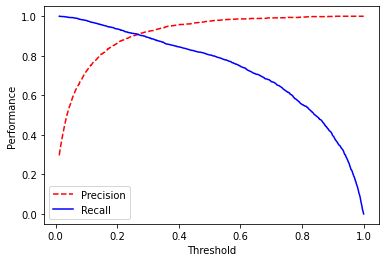

In [146]:
# Threshold-PR curve
train_loss, y_true, y_prob = trainer.eval_step(dataloader=train_dataloader)
precisions, recalls, thresholds = precision_recall_curve(y_true.ravel(), y_prob.ravel())
plt.plot(thresholds, precisions[:-1], "r--", label="Precision")
plt.plot(thresholds, recalls[:-1], "b-", label="Recall")
plt.ylabel("Performance")
plt.xlabel("Threshold")
plt.legend(loc="best")

In [147]:
# Determining the best threshold
def find_best_threshold(y_true, y_prob):
    """Find the best threshold for maximum F1."""
    precisions, recalls, thresholds = precision_recall_curve(y_true, y_prob)
    f1s = (2 * precisions * recalls) / (precisions + recalls)
    return thresholds[np.argmax(f1s)]

In [148]:
# Best threshold for f1
threshold = find_best_threshold(y_true.ravel(), y_prob.ravel())
threshold

0.29068902

**Question**: How can we improve on our process of identifying and using the appropriate threshold?

-  Plot PR curves for all classes (not just overall) to ensure a certain global threshold doesn't deliver very poor performance for any particular class
- Determine different thresholds for different classes and use them during inference

In [149]:
# Determine predictions using threshold
test_loss, y_true, y_prob = trainer.eval_step(dataloader=test_dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])

In [150]:
# Evaluate
metrics = precision_recall_fscore_support(y_test, y_pred, average="weighted")
performance = {"precision": metrics[0], "recall": metrics[1], "f1": metrics[2]}
print (json.dumps(performance, indent=2))

{
  "precision": 0.827096585206665,
  "recall": 0.559652928416486,
  "f1": 0.6495474716680674
}


In [151]:
# Save artifacts
dir = Path("cnn")
dir.mkdir(parents=True, exist_ok=True)
tokenizer.save(fp=Path(dir, "tokenzier.json"))
label_encoder.save(fp=Path(dir, "label_encoder.json"))
torch.save(best_model.state_dict(), Path(dir, "model.pt"))
with open(Path(dir, "performance.json"), "w") as fp:
    json.dump(performance, indent=2, sort_keys=False, fp=fp)

### Inference

In [152]:
# Load artifacts
device = torch.device("cpu")
tokenizer = Tokenizer.load(fp=Path(dir, "tokenzier.json"))
label_encoder = LabelEncoder.load(fp=Path(dir, "label_encoder.json"))
model = CNN(
    embedding_dim=embedding_dim, vocab_size=vocab_size,
    num_filters=num_filters, filter_sizes=filter_sizes,
    hidden_dim=hidden_dim, dropout_p=dropout_p,
    num_classes=num_classes)
model.load_state_dict(torch.load(Path(dir, "model.pt"), map_location=device))
model.to(device)

CNN(
  (embeddings): Embedding(39, 128, padding_idx=0)
  (conv): ModuleList(
    (0): Conv1d(128, 128, kernel_size=(1,), stride=(1,))
    (1): Conv1d(128, 128, kernel_size=(2,), stride=(1,))
    (2): Conv1d(128, 128, kernel_size=(3,), stride=(1,))
    (3): Conv1d(128, 128, kernel_size=(4,), stride=(1,))
    (4): Conv1d(128, 128, kernel_size=(5,), stride=(1,))
    (5): Conv1d(128, 128, kernel_size=(6,), stride=(1,))
    (6): Conv1d(128, 128, kernel_size=(7,), stride=(1,))
    (7): Conv1d(128, 128, kernel_size=(8,), stride=(1,))
    (8): Conv1d(128, 128, kernel_size=(9,), stride=(1,))
    (9): Conv1d(128, 128, kernel_size=(10,), stride=(1,))
  )
  (dropout): Dropout(p=0.5, inplace=False)
  (fc1): Linear(in_features=1280, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=35, bias=True)
)

In [153]:
# Initialize trainer
trainer = Trainer(model=model, device=device)

In [154]:
# Dataloader
text = "Transfer learning with BERT for self-supervised learning"
X = np.array(tokenizer.texts_to_sequences([preprocess(text)]))
y_filler = label_encoder.encode([np.array([label_encoder.classes[0]]*len(X))])
dataset = CNNTextDataset(
    X=X, y=y_filler, max_filter_size=max(filter_sizes))
dataloader = dataset.create_dataloader(
    batch_size=batch_size)

In [155]:
# Inference
y_prob = trainer.predict_step(dataloader)
y_pred = np.array([np.where(prob >= threshold, 1, 0) for prob in y_prob])
label_encoder.decode(y_pred)

[['attention',
  'natural-language-processing',
  'self-supervised-learning',
  'transfer-learning',
  'transformers']]

*limitations*:

- **representation**: embeddings are not contextual.
- **architecture**: extracting signal from encoded inputs is limited by filter widths.

> Since we're dealing with simple architectures and fast training times, it's a good opportunity to explore tuning and experiment with k-fold cross validation to properly reach any conclusions about performance.

### Tradeoffs

We're going to go with the embeddings via CNN approach and optimize it because performance is quite similar to the contextualized embeddings via transformers approach but at much lower cost.

In [156]:
# Performance
with open(Path("cnn", "performance.json"), "r") as fp:
    cnn_performance = json.load(fp)
print (f'CNN: f1 = {cnn_performance["f1"]}')

CNN: f1 = 0.6495474716680674


This was just one run on one split so you'll want to experiment with k-fold cross validation to properly reach any conclusions about performance. Also make sure you take the time to tune these baselines since their training periods are quite fast (we can achieve f1 of 0.7 with just a bit of tuning for both CNN / Transformers). We'll cover optimization in a few lessons so you can replicate the process here on your own time. We should also benchmark on other important metrics as we iterate, not just precision and recall.

In [157]:
# Size
print (f'CNN: {Path("cnn", "model.pt").stat().st_size/1000000:.1f} MB')

CNN: 4.3 MB


We'll consider other tradeoffs such as maintenance overhead, behavioral test performances, etc. as we develop.

> Interpretability was not one of requirements but note that we could've tweaked model outputs to deliver it. For example, since we used SAME padding for our CNN, we can use the activation scores to extract influential n-grams.